In [ ]:
from google.colab import files

uploaded = files.upload()

Saving PrepaidTravelCost.xes to PrepaidTravelCost.xes


#Approach 1

In [ ]:
#IMPORTING LIBRARIES
import xml.etree.cElementTree as tree
import gzip
from os.path import abspath, join, isfile, dirname
from os import listdir
import time
import pandas as pd

In [ ]:
# my classes -not used currently:
#!pip install table
import table as t
#!pip install loadToDB
#import loadToDB as load

to_excel = 0
to_csv = 1
log_to_file = 1

In [ ]:

"""get specific type of files"""
#Check wheather file exist and ends with gz
def getFileListForType(fileType):
    path = abspath(dirname(__file__))
    return [f for f in listdir(path) if isfile(join(path,f)) and f.endswith(fileType) ]

def toLog(message,enable=log_to_file,before=''):
    if enable == 1:
        with open('logs.txt','a+') as log:
            log.write(before + time.strftime('%Y:%m:%d %H:%M:%S') + ' || '+ message + '\n')

In [ ]:
"""open gzfile and save it"""
def openAndSavegzFiles():
    #gzFileList = getFileListForType(".gz")
    toLog('Found '+str(len(gzFileList))+' .gz files and try to unpack')
    for gzFile in gzFileList:
        with gzip.open(gzFile, "rb") as sourceFile:

            start_time = time.time()
            data = sourceFile.read()
            print("Reading data: ", str(time.time() - start_time))

            with open(gzFile[0:-4], 'wb') as targetFile: #assume that end of the file is "_.gz"
                targetFile.write(data)
        toLog('.gz files unpacked.')

def insertDataBase(table,values):
    pass

def saveInsertToDataBase(targetFile):
    pass

def createTableDataBase(table,fields):
    pass

def connectToDatabase(query):
    pass


In [ ]:
####MAIN####
toLog('New run started',before='\n\n')
#unpack .gz files in current folder
#openAndSavegzFiles()

#open and parse xml
#xesFiles = getFileListForType('.xes')

for xesFile in xesFiles:
    toLog(xesFile+ ' - start')
    file_time = time.time()
    with open(xesFile, "r+") as currentFile:

        #parse xml
        start_time = time.time()
        xmlTree = tree.parse(currentFile)
        root = xmlTree.getroot()

        endTime = xesFile+ " - parsing time: "+ str(time.time() - start_time)
        print(endTime)
        toLog(endTime)

        #traverse xml
        start_time = time.time()
        caselog = pd.DataFrame()
        eventlog = pd.DataFrame()

        #get file names
        for field in root:
            if field.attrib.get('key') == "concept:name":
                inFileName = field.attrib.get('value')

        uniqueKey = 0
        eventCount = 0
        for case in root: #go to case level
            if case.tag == 'trace':
                uniqueKey += 1
                caselog.at[uniqueKey,'ID'] = uniqueKey
                caselog.at[uniqueKey,'fileName'] = inFileName
                caselog.at[uniqueKey,'fullFileName'] = xesFile

                for field in case:
                    if field.attrib:
                        caselog.at[uniqueKey,field.attrib['key'].replace(':',"_")] = field.attrib['value']

                # get events
                for event in case: #go to event level
                    if event.tag == 'event':
                        eventCount += 1
                        eventlog.at[eventCount,'ID'] = uniqueKey
                        for field in event:
                            if field.attrib:
                                eventlog.at[eventCount,field.attrib['key'].replace(':',"_")] = field.attrib['value']

        endTime = xesFile+ " - traverse time: "+ str(time.time() - start_time)
        print(endTime)
        toLog(endTime)

        #save to files
        start_time = time.time()
        fileName = inFileName.replace(' ','')+"{}.{}"
        #save to csv
        if to_csv == 1:
            eventlog.to_csv(path_or_buf= fileName.format('_eventlog','csv'),sep=';',index=False)
            toLog(xesFile +'- eventlog saved to '+fileName.format('_eventlog','csv'))
            caselog.to_csv(path_or_buf= fileName.format('_caselog','csv'),sep=';',index=False)
            toLog(xesFile +'- caselog saved to '+fileName.format('_caselog','csv'))

        #save to excel
        if to_excel == 1:
            caselog.to_excel(excel_writer= fileName.format('','xlsx'),sheet_name='caselog',index=False)
            with pd.ExcelWriter(path=fileName.format('','xlsx'), mode='a') as writer:
                eventlog.to_excel(excel_writer=writer,sheet_name='eventlog',index=False)
            toLog(xesFile +'- caselog&eventlog saved to '+fileName.format('','xlsx'))

        endTime = xesFile+ " - saving time: "+ str(time.time() - start_time)
        print(endTime)
        toLog(endTime)

NameError: ignored

#Approach 2

In [ ]:
!pip install pm4py

     |████████████████████████████████| 1.8 MB 28.8 MB/s 
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=46cf2811359b8251ad2915f2f57a7b5a621f1476683fe25f8c01b6b33cd416f8
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23605 sha256=eeebf5b73f3186011d2a85931f654d6081f01b645459a66446834bea72c56d01
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built pyvis stringdist


In [ ]:
import os
from pprint import pprint
import pandas as pd

from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.log import converter as log_converter

#wd = os.path.join('..', 'data', 'cleaned_logs')

#DOM_DEC = os.path.join(wd, 'DomesticDeclarations.xes')
#INT_DEC = os.path.join(wd, 'InternationalDeclarations.xes')
PER = 'PermitLog.xes'
#PRE = os.path.join(wd, 'PrepaidTravelCost.xes')
#REQ = os.path.join(wd, 'RequestForPayment.xes')


def read_log(file):
    return xes_importer.apply(file)

def to_dataframe(log):
    log = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
    return log

In [ ]:
def flat_log(log, tuple_size: int):
    '''
    1. transform events into dataframe:
    '''
    features = []

    for trace in log:
        for idx, event in enumerate(trace[:-1]):
            pre = event
            post = trace[idx+1]

            time_delta = post['time:timestamp'] - pre['time:timestamp']

            pair = {'pre': pre['concept:name'],
                    'post': post['concept:name'],
                    'pre_ts': pre['time:timestamp'],
                    'post_ts': post['time:timestamp'],
                    'ts_delta': time_delta,
                    'pre_role': pre['org:role'],
                    'post_role': post['org:role']}
            features.append(pair)

    return pd.DataFrame(features)

In [ ]:
from datetime import datetime, timezone, timedelta

def stem(label: str, blacklist: list):
    '''
    This function stems a given event label.
    Inputs:
    - label: single label to stem
    - blacklist: list of terms, that should be excluded from the label
    Return: stemmed label
    '''
    parts = label.split(' ')
    parts = list(filter(lambda x: x not in blacklist, parts))
    return ' '.join(parts)

def time_dif(x: tuple, interval: str):
    '''
    Calculate the differences between two points in time.
    Inputs:
        - x: tuple of two datetime objects
        - interval: indicator of the return type; accepted values: 'd', 'h', 's'
    Return: interval in days, hours or seconds
    '''
    res = time_wrap(x[0], x[1])

    days = res.days
    hours = res.seconds//60//60
    seconds = res.seconds

    if interval is 'd':
        return days
    elif interval is 'h':
        return hours + (days * 24)
    elif interval is 's':
        return seconds + (days * 24 * 60 * 60)

def number_of_non_workdays(start, end):
    '''
    Compute the number of days between two points in time, excluding weekends.
    Input:
        - start: datetime object
        - end: datetime object
    Return:
        int: number of days
    '''
    # 0: Monday
    days = []

    while(start <= end):
        days.append(start.weekday())
        start = start + timedelta(days=1)

    days = len(list(filter(lambda x: x > 4, days)))

    return days

def time_wrap(start: datetime, end: datetime, s_hour = 8, e_hour = 18):
    '''
    Return the temporal difference between two points in time, adjusted to a given workschedule.
    Input:
        - start: datetime object
        - end: datetime object
        - s_hour: start of workschedule
        - e_hour: end of workschedule

    Return:
        - timedelta in seconds
    '''

    # worktime after start event
    e_time = datetime(start.year, start.month, start.day, e_hour)
    start = start.replace(tzinfo=None)
    t1 = (e_time - start).seconds

    # worktime before end event
    end = end.replace(tzinfo=None)
    s_time = datetime(start.year, start.month, start.day, s_hour)
    t3 = (end - s_time).seconds

    # calculate days between start and end exclusive non-working days
    days_total = (end - start).days
    non_workingdays = number_of_non_workdays(start, end)

    working_days = days_total - non_workingdays
    if working_days > 1:
        working_days -= 1 # consider only complete day in between
        total_hours_between = (e_hour - s_hour) * working_days

        # convert into seconds
        t2 = total_hours_between * 60 * 60
    else:
        # in this case, there is no full working day between start and end
        t2 = 0

    total_dif = t1 + t2 + t3

    return timedelta(seconds=total_dif)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

color = ['#3498db']
target_dir = 'figures/'

def distplot(data, bins, xlabel, ylabel, title, name, export=False, font_scale=1.5):

    sb.set(rc={"figure.figsize": (8, 5)}, font_scale=font_scale)
    sb.set_style('white')

    ax = sb.distplot(data, bins=48, kde = False, color=color[0])
    ax.set(xlabel=xlabel, ylabel=ylabel)

    if title is not None:
        plt.title(title)

    plt.tight_layout()
    if not export:
        plt.show()
    else:
        file_name = target_dir + name
        plt.savefig(file_name)

In [ ]:
import numpy as np
import math

def get_columns(df: pd.DataFrame):
    return list(df.columns)

def describe_clm(df: pd.DataFrame, clm_name):
    report = {}

    unique_elements = df[clm_name].unique()
    clm = df[clm_name].to_list()

    elements = len(clm)
    missing = get_missing(clm)
    coverage = get_coverage(elements, missing, True)

    report['column'] = clm_name.split(':')[-1]
    report['elements'] = elements
    report['unique_elements'] = len(unique_elements)
    report['NaN'] = missing
    report['coverage'] = coverage

    return report


def get_coverage(total, elements, inverse=False, fields=3):
    if inverse:
        elements = total - elements

    coverage = elements / total * 100

    return round(coverage, fields)

def get_missing(values: list):
    def is_missing(value):
        try:
            if isinstance(value, str):
                return value.upper() is 'UNKNOWN' or value.upper() is 'MISSINMG'

            return value is np.nan or math.isnan(value)
        except TypeError as error:
            return False

    return len(list(filter(lambda x: x, map(is_missing, values))))

In [ ]:
!pip install sys

ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys


In [ ]:
from collections import Counter
from statistics import mean
import matplotlib.pyplot as plt

In [ ]:
!pip install src==0.0.6

  Using cached src-0.0.6.zip (5.6 kB)
  ERROR: Failed building wheel for src
  Running setup.py clean for src
Failed to build src
    Running setup.py install for src ... done


In [ ]:
import sys
#sys.path.insert(1, '../')
#from src.io import PER, read_log

permit_log = read_log(PER)

parsing log, completed traces ::   0%|          | 0/7065 [00:00<?, ?it/s]

In [ ]:
# Setup counter and variables
trip_length_counter = Counter() # Counts the occurences of different trip lengths (nights)
trip_month_counter = Counter()  # Counts the number of trips per month

# Collects the lengths of trips per month
trip_month_length = {1: [], 2: [], 3: [], 4: [], 5:[], 6:[], 7: [], 8: [], 9: [], 10: [], 11: [], 12: []}
# Collects the costs of trips per day per month
trip_month_costs_per_day = {1: [], 2: [], 3: [], 4: [], 5:[], 6:[], 7: [], 8: [], 9: [], 10: [], 11: [], 12: []}

no_excluded = 0             # Number of cases that were excluded from analysis
max_trip_length = 70        # Maximum length of a trip that will be included in the analysis
max_cost_per_day = 100000   # Maximum cost of a trip per day that will be included in the analysis

In [ ]:
# Set up functions to compute averages on trip lengths and costs
def calculate_cost_per_day_average():
    for mo in trip_month_costs_per_day:
        trip_month_costs_per_day[mo] = round(mean(trip_month_costs_per_day[mo]), 2)

def calculate_length_average():
    for mo in trip_month_length:
        trip_month_length[mo] = round(mean(trip_month_length[mo]), 1)

In [ ]:
# Start analysing traces

for permit in permit_log:
    trip_start = None
    trip_end = None
    total_amount = 0

    for event in permit:
        if event["concept:name"] == "Start trip":
            trip_start = event["time:timestamp"]
            continue
        if event["concept:name"] == "End trip":
            trip_end = event["time:timestamp"]
            #total_amount = float(event["(case)_TotalDeclared"])
            break

    # Skip cases with have no trip start or trip end
    if ((not trip_start) or (not trip_end)):
        continue

    # Trip length corresponds to the number of overnight stays, might also be zero
    trip_length = (trip_end - trip_start).days

    if (trip_length > max_trip_length):
        no_excluded += 1
        continue

    # Increase counter for found length
    trip_length_counter[trip_length] += 1

    # Increase counter for the month the trip was started in
    trip_month_counter[trip_start.month] += 1

    # Add trip length to current month (for average later)
    trip_month_length[trip_start.month].append(int(trip_length))

    # Add cost per day to current month (for average later)
    #cost_per_day = total_amount # There are trips with 0 length -> assume that this means one day
    #if (trip_length > 0):
     #   cost_per_day = total_amount / (trip_length+1)
    #if ((cost_per_day > 0) & (cost_per_day < max_cost_per_day)):
     #   trip_month_costs_per_day[trip_start.month].append(cost_per_day)


# Just make sure everything is correct
assert sum(trip_length_counter.values()) == sum(trip_month_counter.values())

#calculate_cost_per_day_average()
calculate_length_average()

In [ ]:
 #Print some information
print(f'Only trips not longer than {max_trip_length} days were considered ({sum(trip_length_counter.values())} trips, {no_excluded} excluded).')
print(f'\nThere are {trip_length_counter[0]} trips with length of zero.')
print(f'\nDetected trip lengths (length in nights, frequency):\n{sorted(trip_length_counter.items())}')
print('\nThese are the 10 most common trip lengths in percent:')
[(length, f'{round(count / sum(trip_length_counter.values()) * 100.0, 1)} %') for length, count in trip_length_counter.most_common(10)]

Only trips not longer than 70 days were considered (27888 trips, 372 excluded).

There are 2016 trips with length of zero.

Detected trip lengths (length in nights, frequency):
[(0, 2016), (1, 3048), (2, 3860), (3, 3612), (4, 3508), (5, 3136), (6, 2376), (7, 1812), (8, 1084), (9, 660), (10, 460), (11, 316), (12, 208), (13, 200), (14, 224), (15, 168), (16, 164), (17, 88), (18, 36), (19, 56), (20, 52), (21, 68), (22, 84), (23, 28), (24, 48), (25, 16), (26, 4), (27, 12), (28, 12), (29, 36), (30, 56), (31, 52), (32, 36), (33, 24), (34, 28), (35, 32), (36, 12), (37, 24), (38, 8), (39, 12), (40, 8), (41, 8), (42, 12), (44, 8), (45, 8), (46, 16), (48, 16), (49, 4), (50, 20), (51, 4), (52, 4), (54, 4), (55, 16), (56, 4), (57, 4), (59, 8), (60, 4), (61, 12), (62, 24), (63, 8), (64, 8), (66, 8), (67, 4)]

These are the 10 most common trip lengths in percent:


[(2, '13.8 %'),
 (3, '13.0 %'),
 (4, '12.6 %'),
 (5, '11.2 %'),
 (1, '10.9 %'),
 (6, '8.5 %'),
 (0, '7.2 %'),
 (7, '6.5 %'),
 (8, '3.9 %'),
 (9, '2.4 %')]

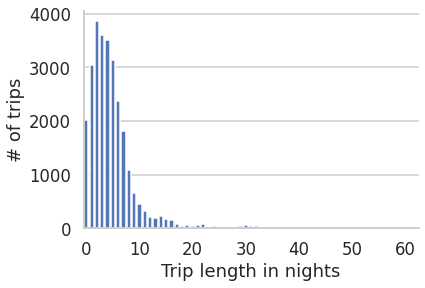

In [ ]:
# Plot trip lengths
import seaborn as sns
sns.set(context="talk", style="whitegrid")

ax = sns.barplot(
    x=list(trip_length_counter.keys()),
    y=list(trip_length_counter.values()),
    color="#4472C4")
ax.set(xlabel='Trip length in nights', ylabel='# of trips')

ax.axes.xaxis.set_ticks([0,10,20,30,40,50,60])
ax.axes.xaxis.set_ticklabels([0,10,20,30,40,50,60])
sns.despine()

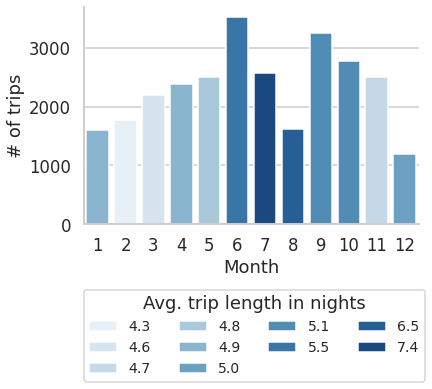

In [ ]:
# Plot number of trips per month
month_key_list = list(trip_month_counter.keys())
month_counter_list = list(trip_month_counter.values())
avg_length_list = list(trip_month_length[mo] for mo in month_key_list)

ax = sns.barplot(
    x=month_key_list,
    y=month_counter_list,
    hue=avg_length_list, palette="Blues",
    dodge=False)
ax.set(xlabel='Month', ylabel='# of trips')

plt.legend(bbox_to_anchor=(0, -0.3), loc=2, ncol=4, borderaxespad=0., title='Avg. trip length in nights', prop={'size': 14})
sns.despine()

In [ ]:
# Plot average costs per day of trips per month
avg_cost_list = list(trip_month_costs_per_day[mo] for mo in month_key_list)

ax = sns.barplot(
    x=month_key_list,
    y=avg_cost_list,
    color="#4472C4")
ax.set(xlabel='Month', ylabel='Avg. cost of one travel day')
sns.despine()

[{'attributes': {'OrganizationalEntity': 'organizational unit 65458', 'ProjectNumber': 'UNKNOWN', 'TaskNumber': 'UNKNOWN', 'dec_id_0': 'declaration 76457', 'ActivityNumber': 'activity 46005', 'TotalDeclared': 39.66456144659199, 'concept:name': 'travel permit 76455', 'RequestedAmount_0': '56', 'Overspent': False, 'travel permit number': 'travel permit number 76456', 'DeclarationNumber_0': 'declaration number 76458', 'id': 'travel permit 76455', 'RequestedBudget': 41.613444658859, 'BudgetNumber': 'budget 922', 'OverspentAmount': 0.0}, 'events': [{'id': 'rv_travel permit 76455_6', 'org:resource': 'STAFF MEMBER', 'concept:name': 'Start trip', 'time:timestamp': datetime.datetime(2016, 10, 5, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'org:role': 'EMPLOYEE'}, '..', {'id': 'fd_declaration 76457_18', 'org:resource': 'SYSTEM', 'concept:name': 'Payment Handled', 'time:timestamp': datetime.datetime(2017, 4, 13, 17, 30, 53, tzinfo=datetime.timezone(datetime.timedelta(second

#Cluster

In [ ]:
# Imports
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
PRE = ('PrepaidTravelCost.xes')
ptc_log = read_log(PRE)

NameError: ignored

#Bottleneck

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving DomesticDeclarations.xes to DomesticDeclarations.xes


In [ ]:
DOM_DEC = ('DomesticDeclaration.xes')
dom_dec_log = read_log(PRE)

In [ ]:
collector = []
for trace in dom_dec_log:
    approve_event = None
    request_event = None
    for event in trace:
        if event['concept:name'] == 'Declaration FINAL_APPROVED by SUPERVISOR':
            approve_event = event['time:timestamp']
        elif event['concept:name'] == 'Request Payment':
            request_event = event['time:timestamp']
            break
    if request_event is not None and approve_event is not None:
        collector.append((approve_event, request_event, trace.attributes['concept:name']))

In [ ]:
print('Found %s pairs.' %len(collector))

In [ ]:
dt_hours = list(map(lambda x: time_dif(x, 'h'), collector))
dt_hours.sort()

In [ ]:
median = dt_hours[len(dt_hours)//2]
print('The median duration is: %s hour(s)' %median)

In [ ]:
print('The maximum duration is: %s hour(s)' %max(dt_hours))

In [ ]:
from google.colab import files
files.download('filename.extension')